In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import datetime

In [23]:
df = pd.read_csv('../data/pollen_train.csv')
df.head()

,Unnamed: 0,location,date,ACER,ALNUS,AMBROSIA,ARTEMISIA,BETULA,CANNABACEAE,CARPINUS,...,PLANTAGO,PLATANUS,POACEAE,POPULUS,QUERCUS,RUMEX,SALIX,TILIA,ULMACEAE,URTICACEAE
0,265,БЕОГРАД - НОВИ БЕОГРАД,2016-02-02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,266,БЕОГРАД - НОВИ БЕОГРАД,2016-02-03,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
2,267,БЕОГРАД - НОВИ БЕОГРАД,2016-02-04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,268,БЕОГРАД - НОВИ БЕОГРАД,2016-02-05,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,269,БЕОГРАД - НОВИ БЕОГРАД,2016-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [27]:
date_strings = df['date']
dates = [datetime.datetime.strptime(date, "%Y-%m-%d").date() for date in date_strings]
data = df['AMBROSIA']

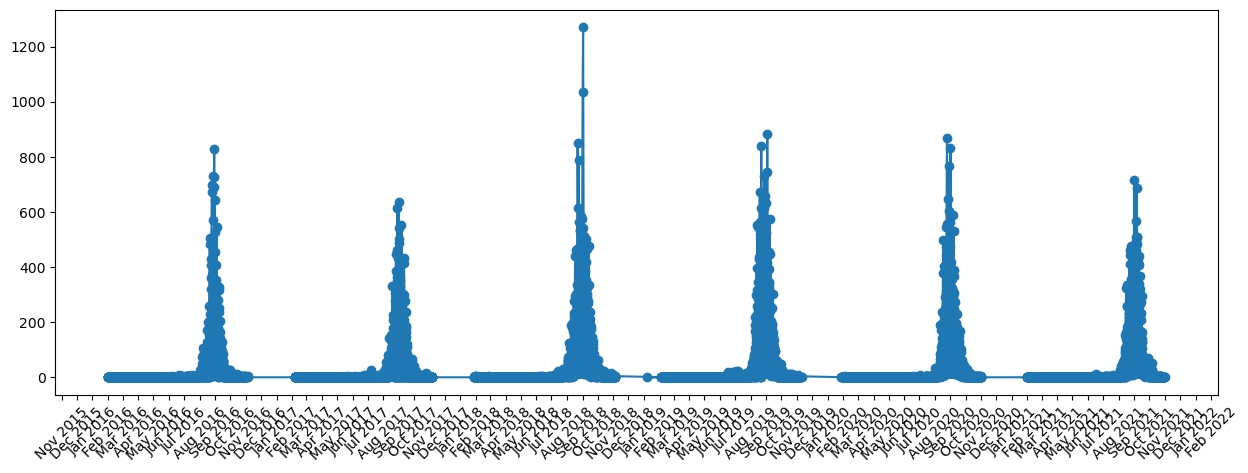

In [31]:
# Use MonthLocator to set monthly ticks on the x-axis
plt.figure(figsize = (15,5))
plt.plot(dates, ambr, marker='o', linestyle='-')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(months)  # Note the use of plt.gca()

# Use DateFormatter to format the date labels
date_format = DateFormatter("%b %Y")  # Format like "Jan 2023"
plt.gca().xaxis.set_major_formatter(date_format)  # Note the use of plt.gca()
plt.xticks(rotation=45)
plt.show()

<BarContainer object of 11254 artists>

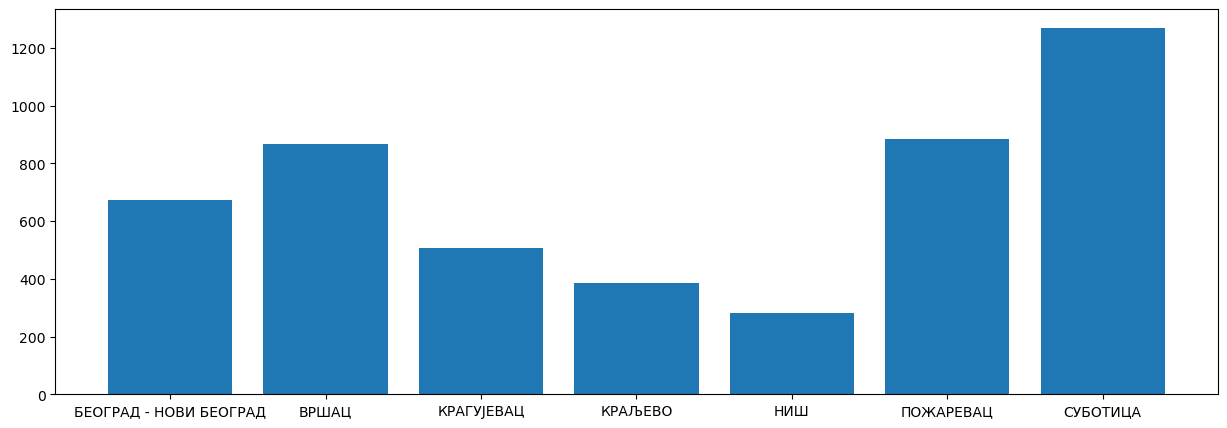

In [34]:
locations = df['location']
plt.figure(figsize = (15, 5))
plt.bar(locations, data)

In [74]:
def filter_weahter_data(path):
    df_weather = pd.read_csv(path)
    to_drop = []
    for i in range(df_weather.shape[0]):
        keep = False
        for j in range(3, df_weather.shape[1]):
            if not pd.isna(df_weather.iloc[i][j]):
                keep = True
                break
        if not keep:
            to_drop.append(i)
    


    return df_weather.drop(to_drop)

In [76]:
df_weather = filter_weahter_data('../data/weather_data.csv')

In [77]:
df_weather.drop(['tsun'], axis = 1)

,Unnamed: 0,location,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
758,758,КРАГУЈЕВАЦ,2018-01-28,-1.2,-4.6,0.8,NaN,NaN,18.0,1.6,NaN,1036.7
759,759,КРАГУЈЕВАЦ,2018-01-29,4.1,-3.6,14.7,NaN,NaN,304.0,3.3,NaN,1031.2
760,760,КРАГУЈЕВАЦ,2018-01-30,6.5,1.3,13.9,NaN,NaN,219.0,7.0,NaN,1027.2
762,762,КРАГУЈЕВАЦ,2018-02-01,6.5,-2.0,16.1,NaN,NaN,178.0,6.5,NaN,1014.8
763,763,КРАГУЈЕВАЦ,2018-02-02,10.9,2.6,17.8,NaN,NaN,162.0,15.1,NaN,1009.2
...,...,...,...,...,...,...,...,...,...,...,...,...
17894,17894,ВРШАЦ,2022-12-27,9.9,4.0,13.0,3.6,NaN,309.0,8.7,NaN,1026.0
17895,17895,ВРШАЦ,2022-12-28,2.4,-3.0,8.4,0.0,NaN,59.0,4.5,NaN,1029.6
17896,17896,ВРШАЦ,2022-12-29,9.7,5.7,12.2,0.0,NaN,154.0,23.6,NaN,1024.0
17897,17897,ВРШАЦ,2022-12-30,11.9,10.6,14.0,0.0,NaN,163.0,19.3,NaN,1023.4


In [79]:
df_weather[df_weather['location'] == 'КРАГУЈЕВАЦ']

,Unnamed: 0,location,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
758,758,КРАГУЈЕВАЦ,2018-01-28,-1.2,-4.6,0.8,NaN,NaN,18.0,1.6,NaN,1036.7,NaN
759,759,КРАГУЈЕВАЦ,2018-01-29,4.1,-3.6,14.7,NaN,NaN,304.0,3.3,NaN,1031.2,NaN
760,760,КРАГУЈЕВАЦ,2018-01-30,6.5,1.3,13.9,NaN,NaN,219.0,7.0,NaN,1027.2,NaN
762,762,КРАГУЈЕВАЦ,2018-02-01,6.5,-2.0,16.1,NaN,NaN,178.0,6.5,NaN,1014.8,NaN
763,763,КРАГУЈЕВАЦ,2018-02-02,10.9,2.6,17.8,NaN,NaN,162.0,15.1,NaN,1009.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,КРАГУЈЕВАЦ,2022-12-27,9.2,6.4,11.4,1.9,NaN,202.0,6.8,20.4,1026.6,NaN
2553,2553,КРАГУЈЕВАЦ,2022-12-28,4.1,0.1,9.0,0.0,NaN,342.0,3.5,13.0,1029.8,NaN
2554,2554,КРАГУЈЕВАЦ,2022-12-29,7.1,1.2,14.7,0.0,NaN,194.0,10.9,24.1,1025.7,NaN
2555,2555,КРАГУЈЕВАЦ,2022-12-30,8.7,4.3,15.6,0.0,NaN,178.0,6.1,18.5,1024.7,NaN


In [162]:

def ambrosia_weather_graphs(df_weather, location, weather_metric, scale_factor = 1):
# Use MonthLocator to set monthly ticks on the x-axis
    date_strings = df[df['location'] == location]['date']
    dates = [datetime.datetime.strptime(date, "%Y-%m-%d").date() for date in date_strings]
    data = df[df['location'] == location]['AMBROSIA']
    plt.figure(figsize = (15,5))
    plt.plot(dates, data, marker='o', linestyle='-')
    months = MonthLocator()
    plt.gca().xaxis.set_major_locator(months)  # Note the use of plt.gca()

    date_strings_weather = df_weather[df_weather['location'] == location]['date']
    date_strings_weather = df_weather[~df_weather[weather_metric].isna()]['date']
    dates_weather = [datetime.datetime.strptime(date, "%Y-%m-%d").date() for date in date_strings_weather]
    data_weather = df_weather[~df_weather[weather_metric].isna()][weather_metric] * scale_factor

    #plt.axhline(y=75, color='red', linestyle='--', label='Horizontal Line')
    
    plt.scatter(dates_weather, data_weather, color = 'red')
    start_date = datetime.date(2016, 1, 1)
    end_date = datetime.date(2021, 10, 1)
    plt.xlim(start_date, end_date)
    # Use DateFormatter to format the date labels
    date_format = DateFormatter("%b %Y")  # Format like "Jan 2023"
    plt.gca().xaxis.set_major_formatter(date_format)  # Note the use of plt.gca()
    plt.xticks(rotation=45)
    plt.show()

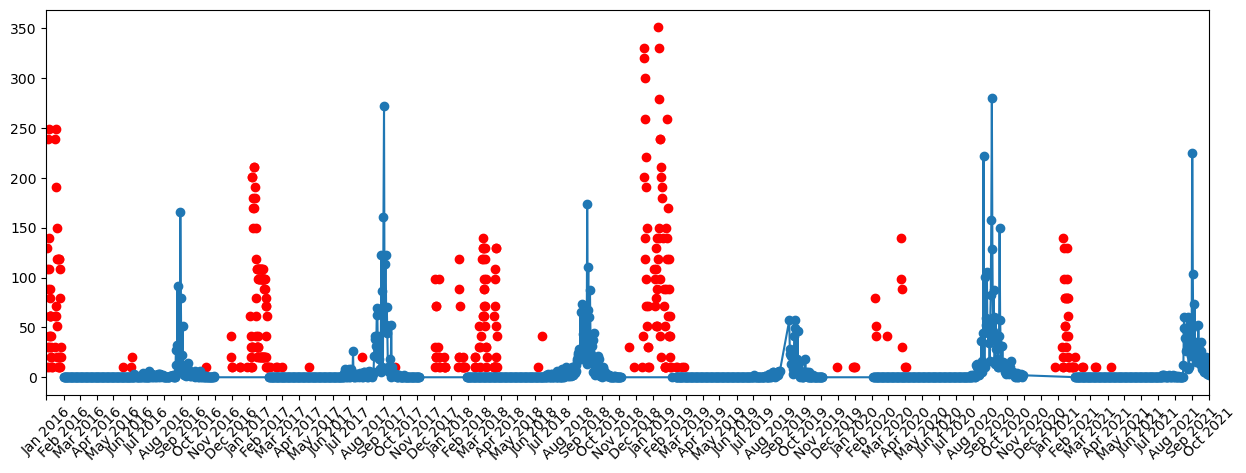

In [163]:
df_weather = filter_weahter_data('../data/weather_data.csv').drop(['tsun', 'pres', 'wpgt'], axis = 1)
df_weather.head()

#plt.axhline(y=75, color='red', linestyle='--', label='Horizontal Line')
ambrosia_weather_graphs(df_weather, 'НИШ', 'snow', 1)

In [157]:
df[df['date'] > '2019-07-31']

,Unnamed: 0,location,date,ACER,ALNUS,AMBROSIA,ARTEMISIA,BETULA,CANNABACEAE,CARPINUS,...,PLANTAGO,PLATANUS,POACEAE,POPULUS,QUERCUS,RUMEX,SALIX,TILIA,ULMACEAE,URTICACEAE
5937,20535,БЕОГРАД - НОВИ БЕОГРАД,2019-08-01,0,0,30,5,0,2,0,...,0,0,8,0,0,0,0,0,0,47
5938,20536,БЕОГРАД - НОВИ БЕОГРАД,2019-08-02,0,0,20,3,0,8,0,...,2,0,2,0,0,0,0,1,0,76
5939,20537,БЕОГРАД - НОВИ БЕОГРАД,2019-08-03,0,0,3,5,0,3,0,...,1,0,2,0,0,0,0,0,0,9
5940,20538,БЕОГРАД - НОВИ БЕОГРАД,2019-08-04,0,0,14,7,0,4,0,...,0,0,1,0,0,0,0,0,0,37
5941,20539,БЕОГРАД - НОВИ БЕОГРАД,2019-08-05,0,0,13,5,0,8,0,...,1,0,3,0,0,1,0,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,39388,СУБОТИЦА,2021-10-20,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11250,39389,СУБОТИЦА,2021-10-21,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11251,39390,СУБОТИЦА,2021-10-22,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11252,39391,СУБОТИЦА,2021-10-23,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
cities = df_weather['location'].unique()

array(['КРАГУЈЕВАЦ', 'КРАЉЕВО', 'НИШ', 'БЕОГРАД - НОВИ БЕОГРАД',
       'ПОЖАРЕВАЦ', 'СУБОТИЦА', 'ВРШАЦ'], dtype=object)

C:\Users\zeljk\AppData\Local\Temp\ipykernel_11772\3592476942.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.imshow(df.corr())


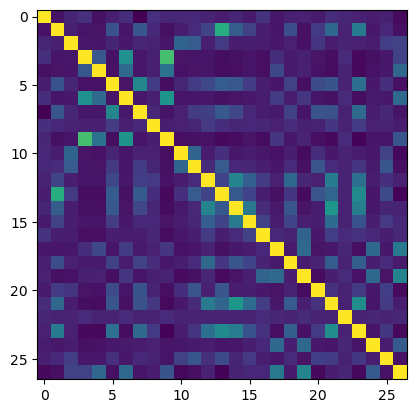

In [158]:
plt.imshow(df.corr())

In [160]:
df.corr()['AMBROSIA']

C:\Users\zeljk\AppData\Local\Temp\ipykernel_11772\3491972252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['AMBROSIA']


Unnamed: 0       0.041152
ACER            -0.048844
ALNUS           -0.038499
AMBROSIA         1.000000
ARTEMISIA        0.191720
BETULA          -0.054270
CANNABACEAE      0.450491
CARPINUS        -0.037936
CELTIS          -0.012475
CHENOP/AMAR.     0.674546
CORYLUS         -0.052484
CUPRESS/TAXA.   -0.047066
FAGUS           -0.045140
FRAXINUS        -0.066587
JUGLANS         -0.059283
MORACEAE        -0.042535
PINACEAE        -0.064331
PLANTAGO         0.034495
PLATANUS        -0.028884
POACEAE         -0.013450
POPULUS         -0.050771
QUERCUS         -0.067161
RUMEX            0.021229
SALIX           -0.081064
TILIA           -0.061817
ULMACEAE        -0.035924
URTICACEAE       0.107839
Name: AMBROSIA, dtype: float64